<a href="https://colab.research.google.com/github/GoutamKk/sample1/blob/main/Binary_classification_of_image_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment : 2
#Binary Classification Of Image

In [1]:
!pip install opendatasets
import opendatasets as ods
ods.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: goutamkumark
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:01<00:00, 167MB/s]


In [2]:
## Mounting to gdrive to retrive image data data
##Before Running Following code make sure to upload data file (zip file on drive) on drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/gdrive/MyDrive/archive.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/archive.zip, /content/gdrive/MyDrive/archive.zip.zip or /content/gdrive/MyDrive/archive.zip.ZIP.


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Image preprocessing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Loading data
train_data = train_datagen.flow_from_directory(
    '/content/cat-and-dog/training_set/training_set', target_size=(128, 128), batch_size=32, class_mode='binary')

validation_data = test_datagen.flow_from_directory(
    '/content/cat-and-dog/test_set/test_set', target_size=(128, 128), batch_size=32, class_mode='binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_data, validation_data=validation_data, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 194ms/step - accuracy: 0.5262 - loss: 0.6983 - val_accuracy: 0.6204 - val_loss: 0.6425
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.6017 - loss: 0.6539 - val_accuracy: 0.6639 - val_loss: 0.6137
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 46s 178ms/step - accuracy: 0.6648 - loss: 0.6132 - val_accuracy: 0.7168 - val_loss: 0.5544
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - accuracy: 0.6716 - loss: 0.5994 - val_accuracy: 0.7301 - val_loss: 0.5525
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 45s 176ms/step - accuracy: 0.6941 - loss: 0.5765 - val_accuracy: 0.7454 - val_loss: 0.5372


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.7485 - loss: 0.5291
Validation Loss: 0.5372421741485596
Validation Accuracy: 0.7454276084899902


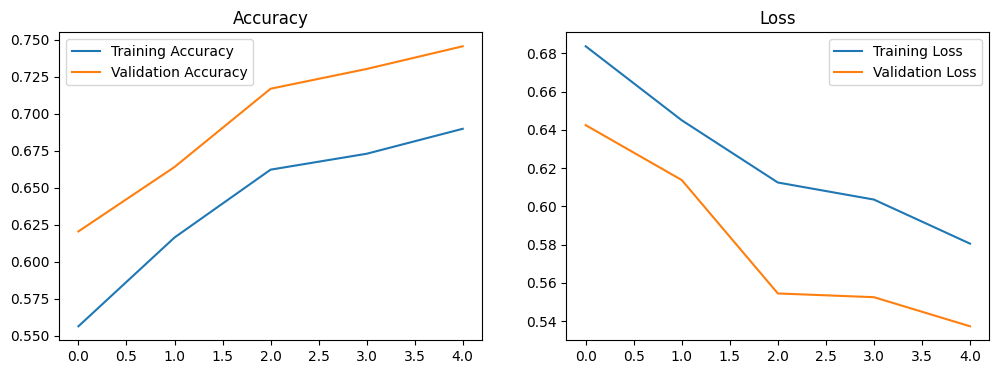

In [11]:
# Evaluate
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(filepath):
    img = image.load_img(filepath, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)
    return 'Class_1' if prediction[0][0] < 0.5 else 'Class_2'

# Example usage
print(predict_image('/content/cat1.jpg'))
print(predict_image('/content/dg1.jpg'))
# Class_1 = cat
#Class_2 = dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Class_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Class_2
